# U.S. Medical Insurance Costs

### An Analysis on costs for medical insurances

Although it is not a requirement for this proyect I will be using numpy, pandas and matplotlib

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


First I printed the first 10 rows in de DataFrame. 
The DataFrame is consisted of 7 columns: age, sex, bmi, children, smoker, region and charges. 
There is data for a total of 1338 persons. 
Looking at the descriptions we can see that the average age is 39.21 years, the average bmi is 30.66, the average children is 1 child per person and the average charge is 13270.42 dollars per person. 

Now I am going to split the DataFrame in two one for the males and another for the females.

In [5]:
male_df = df[(df.sex == 'male')].reset_index(drop=True)
male_df

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
671,31,male,25.935,1,no,northwest,4239.89265
672,61,male,33.535,0,no,northeast,13143.33665
673,51,male,30.030,1,no,southeast,9377.90470
674,52,male,38.600,2,no,southwest,10325.20600


In [6]:
female_df = df[(df.sex == 'female')].reset_index(drop=True)
female_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,31,female,25.74,0,no,southeast,3756.62160
2,46,female,33.44,1,no,southeast,8240.58960
3,37,female,27.74,3,no,northwest,7281.50560
4,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
657,52,female,44.70,3,no,southwest,11411.68500
658,18,female,31.92,0,no,northeast,2205.98080
659,18,female,36.85,0,no,southeast,1629.83350
660,21,female,25.80,0,no,southwest,2007.94500


Afeter doing this we know there is 676 men and 662 women in the DataFrame. So there is an equal size portion of both genders to coduct the analysis. 

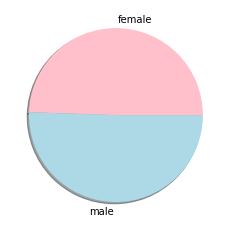

In [23]:
df_gender = df.groupby('sex').age.count()
labels = ['female', 'male']
colors = ['pink', 'lightblue']
plt.pie(df_gender, shadow=True, labels=labels, colors=colors)
plt.show()

In [18]:
male_df_region = male_df.groupby('region').charges.mean()
male_df_region

region
northeast    13854.005374
northwest    12354.119575
southeast    15879.617173
southwest    13412.883576
Name: charges, dtype: float64

In [17]:
female_df_region = female_df.groupby('region').charges.mean()
female_df_region

region
northeast    12953.203151
northwest    12479.870397
southeast    13499.669243
southwest    11274.411264
Name: charges, dtype: float64

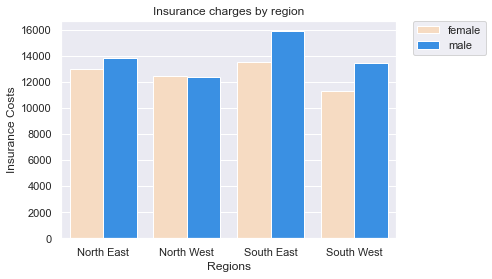

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [61]:
df_region = df.groupby(['sex', 'region']).charges.mean().reset_index()
pivoted_df_region = df_region.pivot(columns='region', index='sex', values='charges')

sns.set_theme(palette="pastel")
ax = sns.barplot(x='region', y='charges', data=df_region, hue='sex', palette=['peachpuff', 'dodgerblue'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Insurance charges by region')
ax.set_xticklabels(['North East', 'North West', 'South East', 'South West'])
ax.set_xlabel('Regions')
ax.set_ylabel('Insurance Costs')
plt.show()
              
pivoted_df_region

In [131]:
df_by_region = df.groupby('region').age.count().reset_index()
df_by_region

,region,age
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


The majority of the people analyse in this Data Frame are from the Southeast region.

#### Initial findings

By looking at the bar plot we can see that Insurance medical costs in the southeast region are more expensive than in the other regions. 
Also men's charges are more expensive than women's in all regions except in the northwest region.

In [54]:
smoker_df = df.groupby(['smoker', 'sex']).charges.mean().reset_index()
smoker_df

,smoker,sex,charges
0,no,female,8762.297300
1,no,male,8087.204731
2,yes,female,30678.996276
3,yes,male,33042.005975


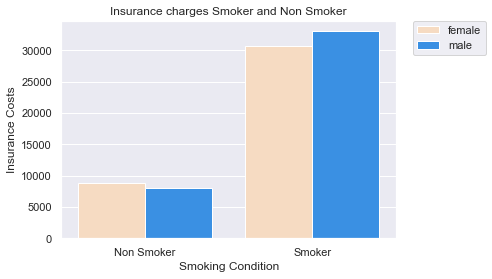

In [59]:

sns.set_theme(palette="pastel")
ax = sns.barplot(x='smoker', y='charges', data=smoker_df, hue='sex', palette=['peachpuff', 'dodgerblue'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(['Non Smoker', 'Smoker'])
ax.set_xlabel('Smoking Condition')
ax.set_ylabel('Insurance Costs')
plt.title('Insurance charges Smoker and Non Smoker')
plt.show()

### Insurance charges for smokers
By viewing the charges for both smokers and non smokers, we can see that insurance charges for smokers triple the costs of the charges for non smokers.

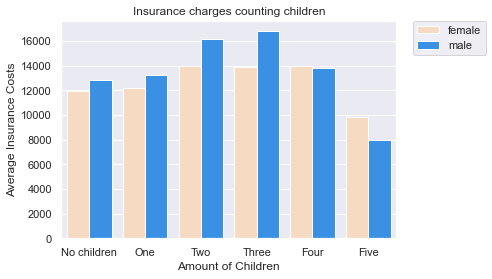

In [64]:
df_children = df.groupby(['children', 'sex']).charges.mean().reset_index()
sns.set_theme(palette="pastel")
ax = sns.barplot(x='children', y='charges', data=df_children, hue='sex', palette=['peachpuff', 'dodgerblue'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(['No children', 'One', 'Two', 'Three', 'Four', 'Five'])
ax.set_xlabel('Amount of Children')
ax.set_ylabel('Average Insurance Costs')
plt.title('Insurance charges counting children')
plt.show()

### Cost difference with children
In this Bar plot we can see that insurance costs for persons with two or three children are more expensive than those with four or five. 
Also there is a major cost for women with five children than those for men with equally quantity of children.

In [65]:
df_smoker_count = df.groupby('smoker').sex.count().reset_index()
df_smoker_count

,smoker,sex
0,no,1064
1,yes,274


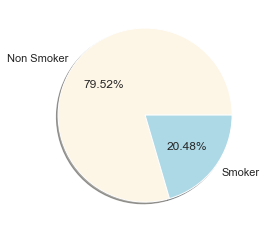

In [72]:
labels = ['Non Smoker', 'Smoker']
colors = ['oldlace', 'lightblue']
plt.pie(df_smoker_count['sex'], shadow=True, labels=labels, colors=colors, autopct="%0.2f%%")
plt.show()

### Non Smoker's vs Smoker's
Roughly 80 % of the persons included in this data are Non Smokers. 
We are going to investigate the relation of the smoker's with the quantity of children and try to see is there si any indication that the influence the costs for parents with 2 and 3 children. 

In [73]:
df_smoker_children = df.groupby(['smoker', 'children']).charges.mean().reset_index()
df_smoker_children

,smoker,children,charges
0,no,0,7611.793335
1,no,1,8303.109350
2,no,2,9493.093674
3,no,3,9614.519391
4,no,4,12121.344408
5,no,5,8183.845556
6,yes,0,31341.363954
7,yes,1,31822.654334
8,yes,2,33844.235755
9,yes,3,32724.915268


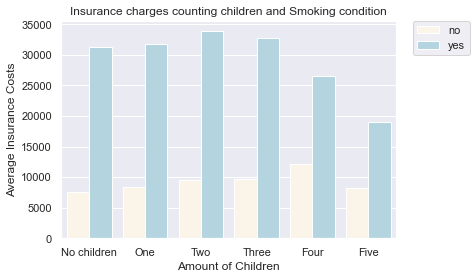

In [74]:
sns.set_theme(palette="pastel")
ax = sns.barplot(x='children', y='charges', data=df_smoker_children, hue='smoker', palette=['oldlace', 'lightblue'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(['No children', 'One', 'Two', 'Three', 'Four', 'Five'])
ax.set_xlabel('Amount of Children')
ax.set_ylabel('Average Insurance Costs')
plt.title('Insurance charges counting children and Smoking condition')
plt.show()

We can see from this chart that the costs for non smokers are fairly equivalent and so are the costs for smokers with no children to three children. But the costs drop for both conditions when there are five children.
Let's investigate the relation of the BMI and the costs of insurance.

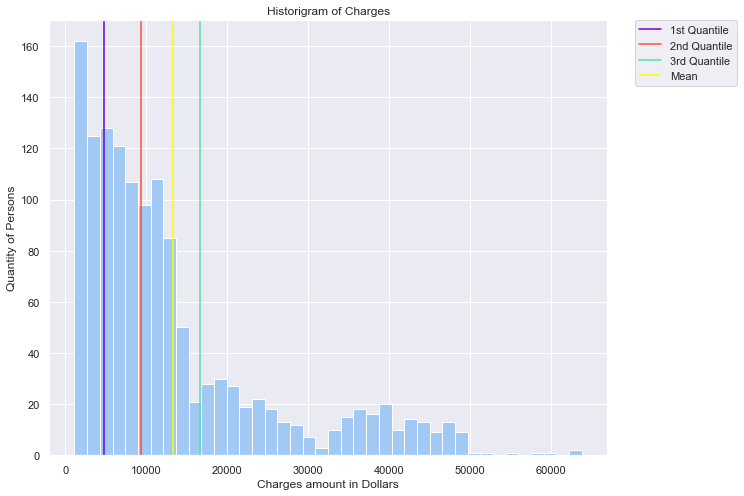

In [117]:
sns.set_theme(palette="pastel")
plt.close()
plt.figure(figsize=(10, 8))
plt.hist(df.charges, bins=40)
q1 = np.quantile(df.charges, 0.25)
q2 = np.quantile(df.charges, 0.50)
q3 = np.quantile(df.charges, 0.75)
mean = np.mean(df.charges.values)
plt.axvline(x=q1, label="1st Quantile", c = '#6400e4')
plt.axvline(x=q2, label="2nd Quantile", c = '#fd4d3f')
plt.axvline(x=q3, label="3rd Quantile", c = '#4fe0b0')
plt.axvline(x=mean, label="Mean", c = 'yellow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Charges amount in Dollars')
plt.ylabel('Quantity of Persons')
plt.title('Historigram of Charges')
plt.show()

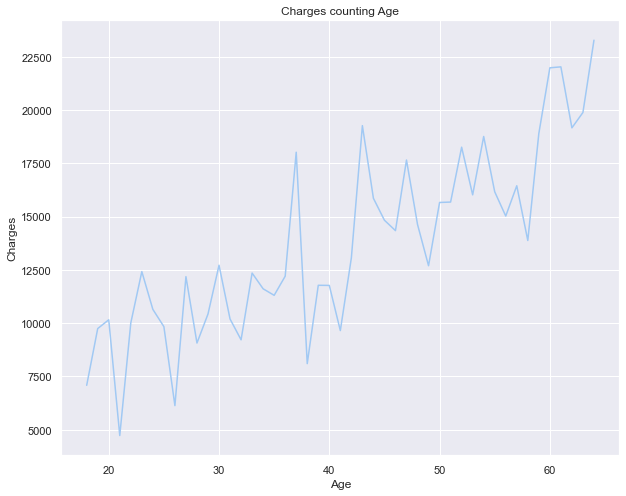

In [114]:
df_age = df.groupby('age').charges.mean().reset_index()
plt.figure(figsize=(10, 8))
plt.plot(df_age.age, df_age.charges)
plt.title('Charges counting Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.show()

c:\users\mariano miró\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


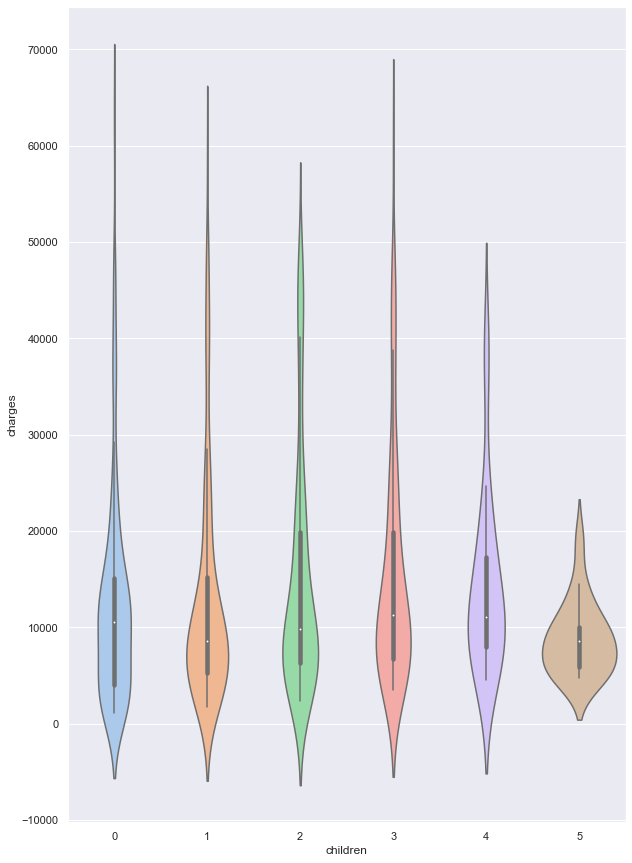

In [100]:
df_bmi_children = df.groupby(['bmi', 'children']).charges.mean().reset_index()

f, ax = plt.subplots(figsize=(10, 15))
ax = sns.violinplot(df_bmi_children['children'], df_bmi_children['charges'])

plt.show()

In [115]:
sorted_df = df.sort_values(by='charges').reset_index(drop=True)
sorted_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [120]:
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['Under 20','20 to 30','30 to 40','40 to 50','50 to 60', 'Upper 60']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,age,sex,bmi,children,smoker,region,charges,AgeGroup
0,19,female,27.900,0,yes,southwest,16884.92400,Under 20
1,18,male,33.770,1,no,southeast,1725.55230,Under 20
2,28,male,33.000,3,no,southeast,4449.46200,20 to 30
3,33,male,22.705,0,no,northwest,21984.47061,30 to 40
4,32,male,28.880,0,no,northwest,3866.85520,30 to 40
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50 to 60
1334,18,female,31.920,0,no,northeast,2205.98080,Under 20
1335,18,female,36.850,0,no,southeast,1629.83350,Under 20
1336,21,female,25.800,0,no,southwest,2007.94500,20 to 30


c:\users\mariano miró\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


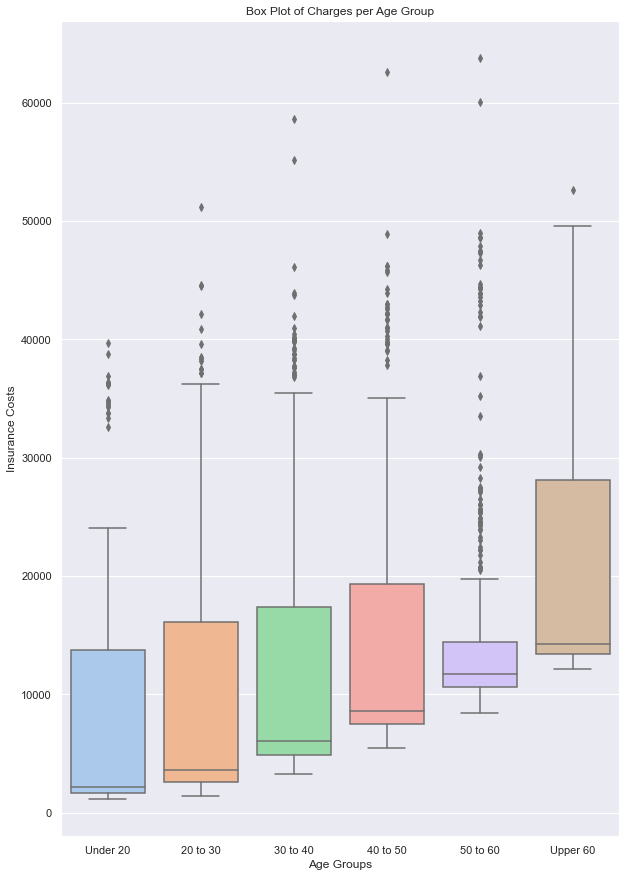

In [124]:
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.boxplot(df['AgeGroup'], df['charges'])
plt.title('Box Plot of Charges per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Insurance Costs')
plt.show()

In [125]:
df_ages = df.groupby('AgeGroup').charges.count().reset_index()
df_ages

,AgeGroup,charges
0,Under 20,137
1,20 to 30,280
2,30 to 40,257
3,40 to 50,279
4,50 to 60,271
5,Upper 60,114


### Analysis of the Blox Plot by Age Group
By looking at the Box Plot we can see that there are many outliers in the Data Set. specially in the Age Group of 50 to 60. By looking at the numbers we can see that this group is the third largest group in the Data Frame. It size is almost equivalent to the groups of 20 to 50. 

In [127]:
df_50_to_60 = df[(df.AgeGroup == '50 to 60')].reset_index(drop=True)
df_50_to_60.describe()

,age,bmi,children,charges
count,271.000000,271.000000,271.000000,271.000000
mean,54.339483,31.510203,1.051661,16495.232665
std,2.871809,6.084097,1.175800,10976.948550
min,50.000000,18.050000,0.000000,8442.667000
25%,52.000000,26.890000,0.000000,10586.968350
50%,54.000000,31.600000,1.000000,11729.679500
75%,57.000000,35.807500,2.000000,14388.553600
max,59.000000,49.060000,5.000000,63770.428010


In [132]:
df_outliers_50to60 = df_50_to_60[(df_50_to_60.charges > 15000)].reset_index(drop=True)
df_outliers_50to60 = df_outliers_50to60.sort_values(by='charges')
df_outliers_region = df_outliers_50to60.groupby('region').age.count().reset_index()
df_outliers_region

,region,age
0,northeast,19
1,northwest,15
2,southeast,25
3,southwest,7


The majority of the outliers live in the South East Region

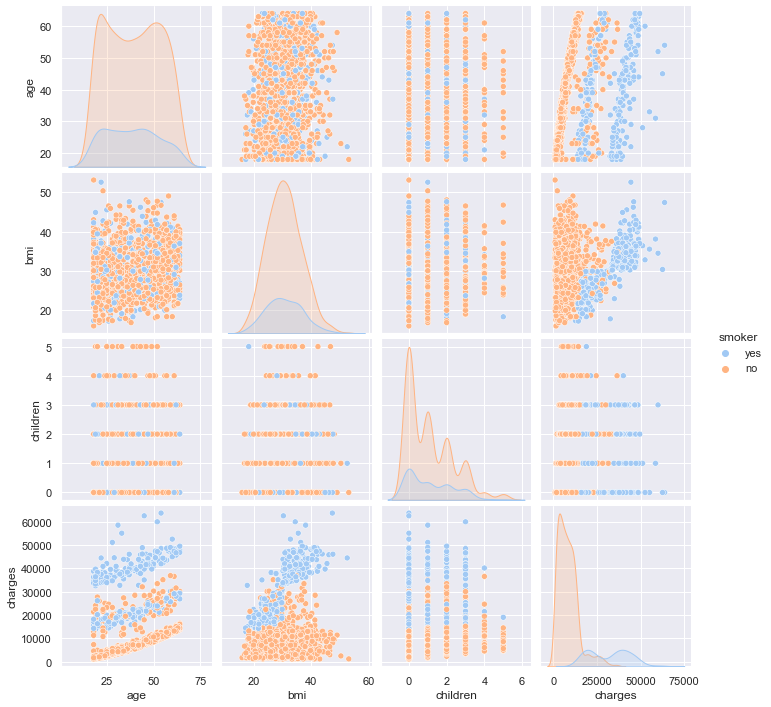

In [135]:
sns.pairplot(df, hue="smoker")

## Conclutions
After the analysis we can say that there is a strong correlation between insurance costs and smoking conditions. Smoker's Insurance costs in average triple the non smoker's. 

Insurance costs increase as people become older. 

There is not enough evidence to establish that a higher BMI correlates with a more expensive insurance costs. Also the number of children is not an indication that the insurance costs are higher.  

Most of the outliers seen in the Data Set belong to people who smoke.

In order to reduce Insurance Costs people should quit smoking and do more exercise. 